In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

I did some pre-modeling, removing useless columns for the analysis, with excel.

In [3]:
file_path = 'C:/Users/xfilh/Documents/Kaggle_dados/fifa_new.xlsx'

fifa_sts = pd.read_excel(file_path)

# Data Exploration

In [4]:
fifa_sts.head(5)

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,17018,721,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,27,15494,762,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,25,1905,839,"CM,CAM",France,88,91,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,27,16256,59,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,27,18796,889,CB,Senegal,88,91,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


In [5]:
fifa_sts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  int64  
 2   weight_kgs                     17954 non-null  int64  
 3   positions                      17954 non-null  object 
 4   nationality                    17954 non-null  object 
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   value_euro                     17699 non-null  float64
 8   wage_euro                      17708 non-null  float64
 9   preferred_foot                 17954 non-null  object 
 10  international_reputation(1-5)  17954 non-null  int64  
 11  weak_foot(1-5)                 17954 non-null  int64  
 12  skill_moves(1-5)               17954 non-null 

In [6]:
fifa_sts.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,14555.130890,604.525510,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,6528.512029,288.433223,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,1524.000000,54.000000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,15494.000000,649.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,17526.000000,721.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,18542.000000,789.000000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,20574.000000,1102.000000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [25]:
group = fifa_sts.groupby(['body_type']).size()
group

body_type
Akinfenwa                 1
C. Ronaldo                1
Lean                   6009
Messi                     1
Neymar                    1
Normal                 8921
PLAYER_BODY_TYPE_25       1
Shaqiri                   1
Stocky                  953
dtype: int64

## Removing the GK as there is no specific data about the position.

In [22]:
fifa_sts = fifa_sts[~fifa_sts['positions'].str.contains('GK')]
fifa_sts.to_excel(file_path)

## Replacing body type outliers with column mode

In [26]:
moda = fifa_sts['body_type'].mode()[0]
moda

'Normal'

In [30]:
fifa_sts['body_type'] = fifa_sts['body_type'].apply(lambda x: x if x in ['Normal', 'Stocky', 'Lean'] else moda)

In [31]:
group = fifa_sts.groupby(['body_type']).size()
group

body_type
Lean      6009
Normal    8927
Stocky     953
dtype: int64

In [33]:
fifa_sts.to_excel(file_path)

## There are too many positions, to better visualization we will reduce all players to one specific position

### To do this, I will randomly choose a position based on the multiple positions of each cell. From there, replacing the cell with just the chosen position.

In [78]:
import random

# found a problem with the index in the dataset, gonna reset

fifa_sts = fifa_sts.reset_index(drop=True)

def random_choice_from_cell(dataframe, row, col, delimiter=','):
    try:
        cell_value = dataframe.at[row, col]
        # Divide cell value by delimiter and transform into list
        cell_list = cell_value.split(delimiter)
        # Choose an element at random from the list
        chosen_value = random.choice(cell_list).strip()
        # Replace the value in the cell
        dataframe.at[row, col] = chosen_value
    except KeyError:
        print(f"KeyError: Coluna '{col}' ou linha '{row}' não existe no DataFrame")
    except IndexError:
        print(f"IndexError: Índice da linha '{row}' está fora do alcance do DataFrame")

# Apply the function to all cells in the 'positions' column
for index in range(len(fifa_sts)):
    random_choice_from_cell(fifa_sts, index, 'positions')

# Show the modified DataFrame
fifa_sts['positions']

0         ST
1        CAM
2         CM
3         ST
4         CB
        ... 
15884    CAM
15885    CAM
15886     LB
15887     ST
15888     ST
Name: positions, Length: 15889, dtype: object

<Axes: xlabel='positions'>

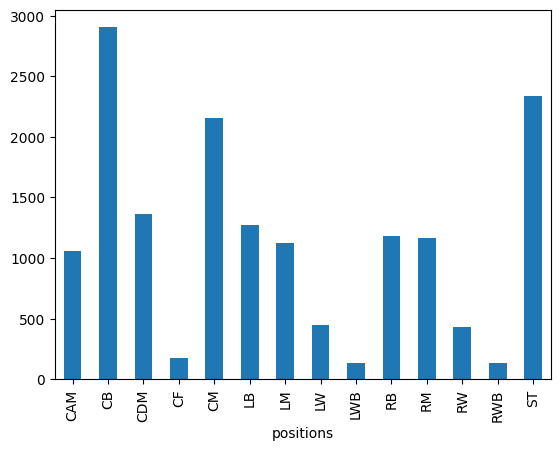

In [70]:
group = fifa_sts.groupby(['positions']).size()
group
group.plot.bar()

# What is the relationship between body type and the position the player plays?

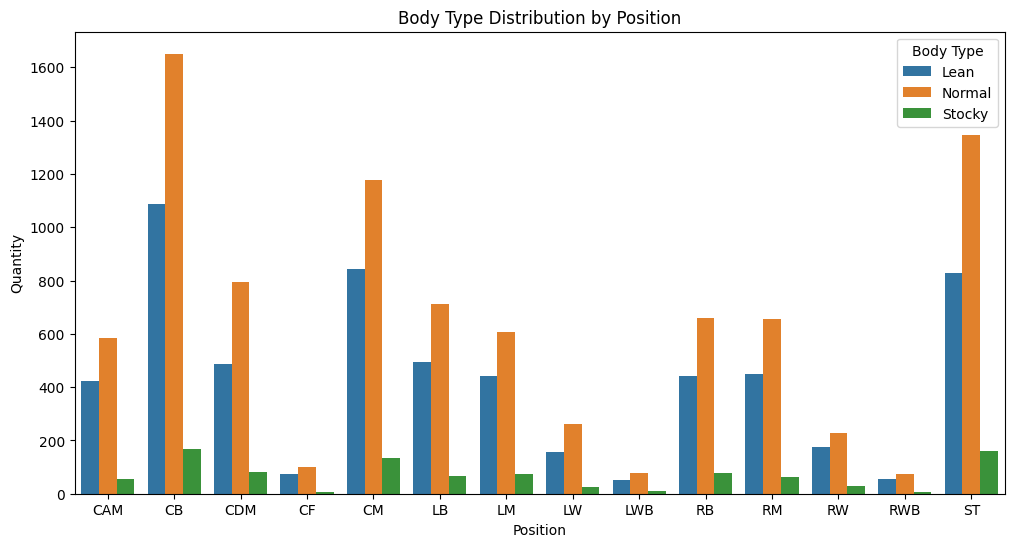

In [77]:
body_type_counts = fifa_sts.groupby(['positions', 'body_type']).size().reset_index(name='counts')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='positions', y='counts', hue='body_type', data=body_type_counts)
plt.title('Body Type Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Quantity')
plt.legend(title='Body Type')
plt.show()

## Now we will see this data proportionally, for better precision

In [91]:
# Count total players by position
position_counts = fifa_sts.groupby('positions').size().reset_index(name='total')

# Merge total counts with body type counts
body_type_proportions = pd.merge(body_type_counts, position_counts, on='positions')

# calculate the proportion
body_type_proportions['proportion'] = body_type_proportions['counts'] / body_type_proportions['total']

print("\nBody type proportion by position:")
print(body_type_proportions)


Body type proportion by position:
   positions body_type  counts  total  proportion
0        CAM      Lean     423   1062    0.398305
1        CAM    Normal     583   1062    0.548964
2        CAM    Stocky      56   1062    0.052731
3         CB      Lean    1088   2905    0.374527
4         CB    Normal    1651   2905    0.568330
5         CB    Stocky     166   2905    0.057143
6        CDM      Lean     488   1366    0.357247
7        CDM    Normal     796   1366    0.582723
8        CDM    Stocky      82   1366    0.060029
9         CF      Lean      73    178    0.410112
10        CF    Normal     100    178    0.561798
11        CF    Stocky       5    178    0.028090
12        CM      Lean     842   2152    0.391264
13        CM    Normal    1177   2152    0.546933
14        CM    Stocky     133   2152    0.061803
15        LB      Lean     494   1273    0.388060
16        LB    Normal     712   1273    0.559309
17        LB    Stocky      67   1273    0.052632
18        LM   

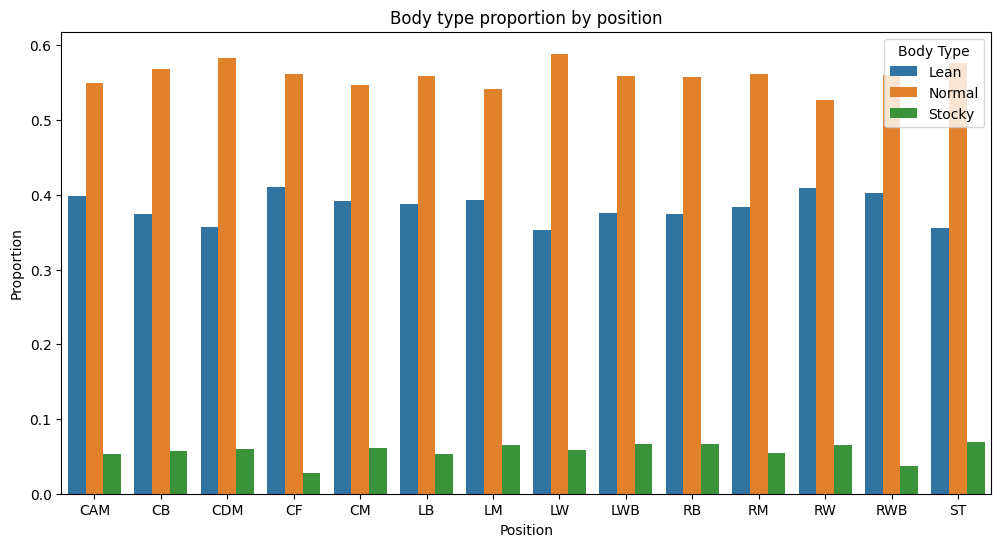

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(x='positions', y='proportion', hue='body_type', data=body_type_proportions)
plt.title('Body type proportion by position')
plt.xlabel('Position')
plt.ylabel('Proportion')
plt.legend(title='Body Type')
plt.show()

There is no big diff in the position and the player's body type

body_type
Normal    0.561798
Lean      0.410112
Stocky    0.028090
Name: proportion, dtype: float64


<Axes: xlabel='body_type'>

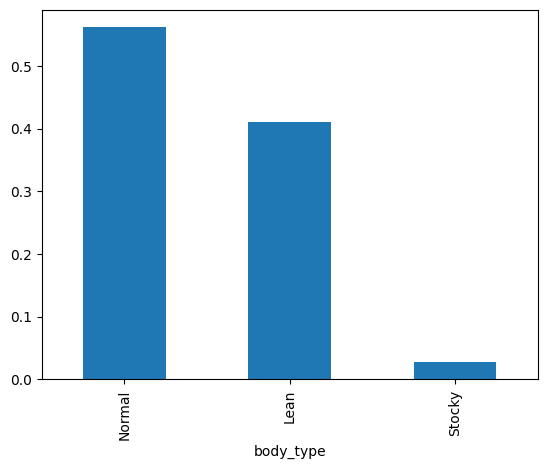

In [86]:
group = fifa_sts.query("positions == 'CF'")['body_type'].value_counts(normalize=True)
print(group)
group.plot.bar()

## Is there any relationship between the body type and the sprint speed?

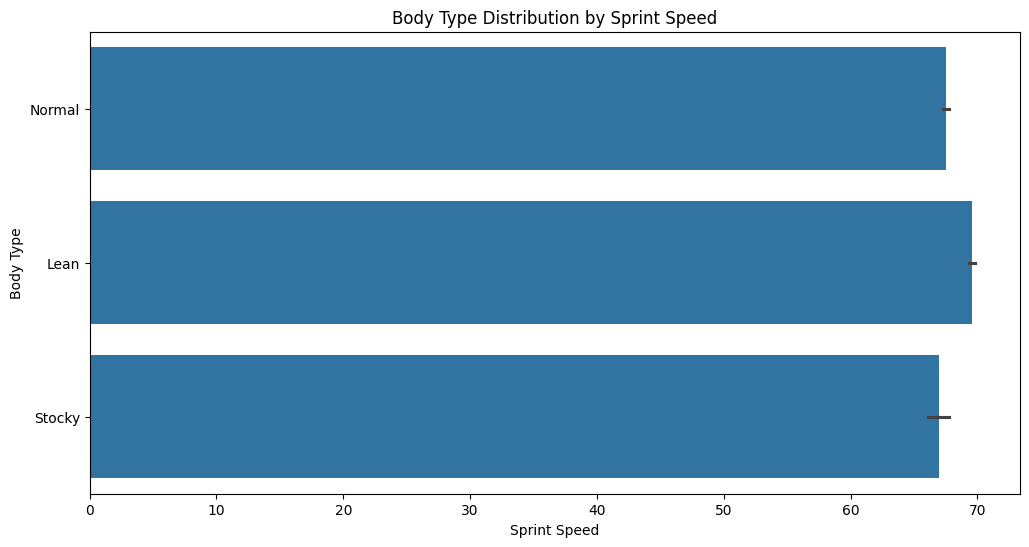

In [96]:
#speed_counts = fifa_sts.groupby(['body_type', 'sprint_speed']).size().reset_index(name='counts')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='sprint_speed', y='body_type', data=fifa_sts)
plt.title('Body Type Distribution by Sprint Speed')
plt.xlabel('Sprint Speed')
plt.ylabel('Body Type')
#plt.legend(title='Sprint Speed')
plt.show()

Well Stocky players do really have a good sprint speed performance al